In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### numpy로 입력 데이터 만들기

In [ ]:
import numpy as np
# np.column_stack(): 2개의 리스트를 zip처럼 나란히 붙여서 2차원 배열로 만들어줌.
# 주의: 연결할 2개의 리스트를 튜플로 전달함.
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


### numpy로 타깃 데이터 만들기

In [ ]:
# np.concatenate(): 첫 번째 차원을 따라 배열을 연결. + 역할. 얘도 튜플로 전달
# np.ones(), np.zeros()
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런으로 train set, test set 나누기

In [ ]:
# train_test_split(): 리스트나 배열을 비율(기본 25%)에 맞게 알아서 섞고 나눠줌. 얘도 random_state 매개 변수로 seed 지정 가능.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(test_target) # 샘플링 편향이 조금 나타남. 도미가 원래 비율보다 좀 더 많음.
# 훈련 세트와 테스트 세트의 클래스 비율이 일정해야 -> 올바른 학습 가능
# stratify 매개변수로 해결.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify 매개변수로 샘플링 편향 해결
# 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### k-최근접 이웃 훈련하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]])) # 도미라서 1이 나와야 하는데 0 나옴

[0.]


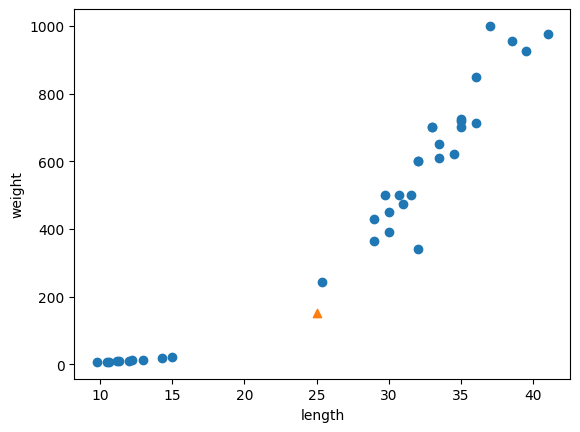

In [ ]:
# 산점도로 확인하기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # 삼각형으로
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 이웃 확인해보기

In [ ]:
# kneighbors(): 가장 가까운 이웃 찾아줌. 이웃까지의 거리, 이웃 샘플의 인덱스 반환
distances, indexes = kn.kneighbors([[25, 150]])

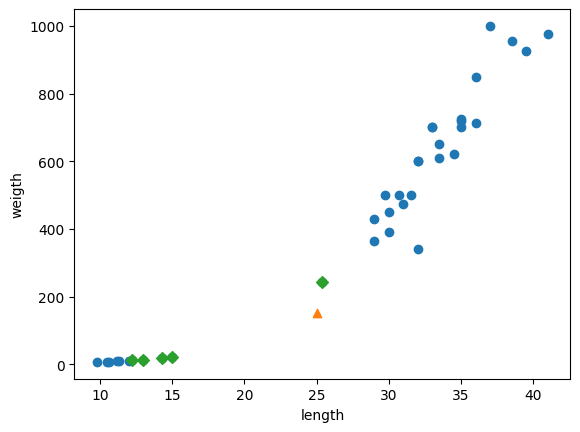

In [ ]:
# 산점도로 그리기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 배열 인덱싱
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)
# 거리 비율이 이상함. 92의 몇 배는되어보임.
# x축은 범위가 좁고 y축은 범위가 넓음. -> 그래서 빙어로 계속 선택됨.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### x, y 범위 동일하게 산점도 다시 그리기

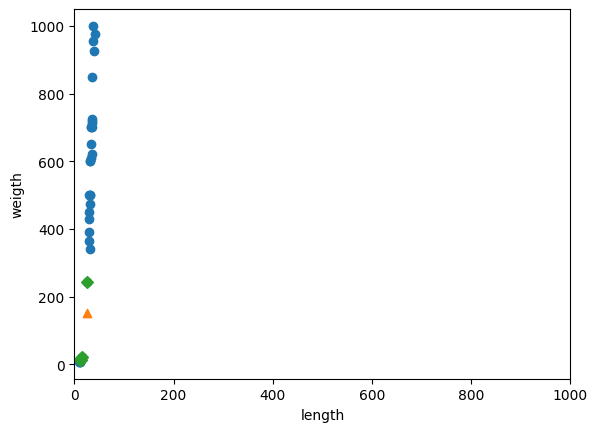

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # 이상한 애
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 이웃들
plt.xlim((0, 1000)) # y축이랑 범위 맞춤
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

-> x축은 거의 고려 대상에 속하지도 않음

# 데이터 전처리
## 표준점수

In [ ]:
mean = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준 편차
# 각 특성별로 계산을 해야함 = 행을 따라서 각 열의 통계 값 계산 = axis=0 : 세로 방향으로 계산을 하는 방식.
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련

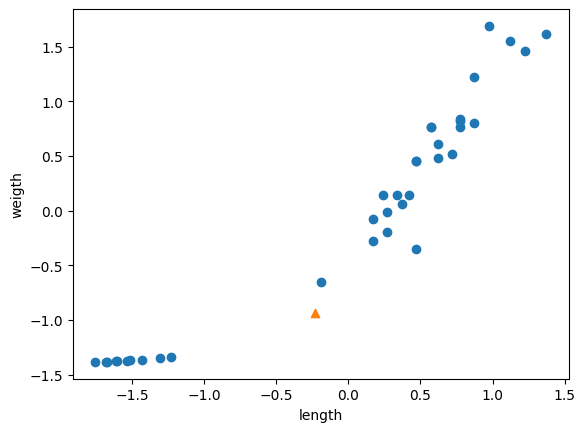

In [ ]:
# 산점도
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
# 훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std # 테스트 데이터도 스케일에 맞게 전처리
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 이상한 데이터 다시 예측해보기
print(kn.predict([new])) # 이제는 맞음.

[1.]


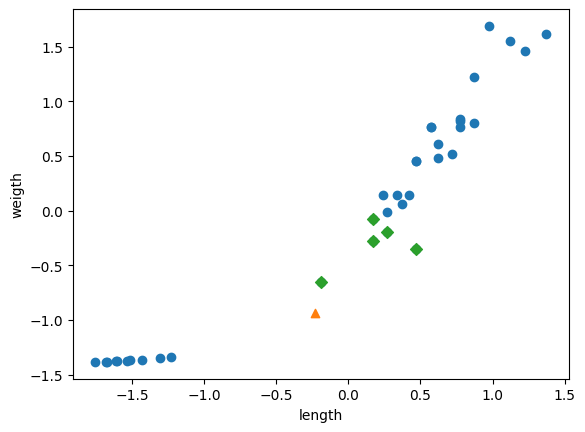

In [ ]:
# 이웃 다시 확인해보기
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()